In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective: 
- to make features for the customers database based on their accounts and their banking patterns

**process**:
1. load `customers_df`, remove unncessary columns.
2. load `savings account df`, and `pd.merge` with `customers_df` using `"cust_id"` as the join key
3. load `savings_transactions_df` and `pd.merge` like above
4. select / calculate relevant parameters
5. save the dataframe as `customers_savings`
6. repeat 2-5 for checking and credit accounts, saving as `customers_checking` and `customers_credit` respectively
7. merge all 3 dataframes (customers_savings, customer_checking, customer_credit) into one big dataframe called `customer_final`

**Features we're selecting**:

**From savings:
    
    **numerical features**:

    1. incomeToSavingsRatio i.e. their income / average monthly savings
    2. creditToLimitRatio* i.e. their average credit spending / by their credit limit
    3. averageCheckingRate i.e. how many times they transact each month
    
    **categorical features:
        
    4. hasSavings*
    5. hasCheckings*
    6. hasCredit*
    7. spendingPattern: numSmallTnx, numMedTnx, numLargeTnx

In [2]:
# loading the customer dataframe..
customer_df = pd.read_csv('../../data/twm_customer.csv', sep=';')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [3]:
# keeping only the relevant columns
customer_df = customer_df[['cust_id', 'income']]
customer_df.head()

,cust_id,income
0,1362691,26150
1,1362487,6605
2,1363160,18548
3,1362752,47668
4,1362548,44554


## Savings
### Savings Account


In [4]:
savings_accounts_df = pd.read_csv('../../data/twm_savings_acct.csv', sep=';') 
# accounts_df.head()
# Merging savings_account with customer_df
customer_accounts_df = customer_df.merge(savings_accounts_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_df.sort_values('cust_id')

,cust_id,income,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
280,1362480,50890,13624803,100,BS,Y,23.12.1992,NaN,707.09,1187.97
239,1362484,10053,13624843,100,BS,Y,2.1.1993,NaN,194.76,2122.17
219,1362486,10701,13624863,100,BS,Y,13.7.1989,NaN,284.48,116.24
0,1362487,6605,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
405,1362489,55888,13624893,100,BS,Y,13.9.1993,NaN,760.24,373.65
...,...,...,...,...,...,...,...,...,...,...
381,1363490,0,13634903,100,BS,Y,27.11.1994,NaN,2267.29,2301.53
157,1363491,0,13634913,100,BS,N,22.10.1990,19.4.1995,205.45,17.82
361,1363492,142274,13634923,100,BS,Y,31.12.1991,NaN,952.38,1116.10
138,1363493,30068,13634933,100,BS,N,8.6.1993,19.7.1995,331.18,553.61


In [5]:
# create the 'hasSavings' feature
customer_accounts_df['hasSavings'] = customer_accounts_df['starting_balance'].\
                                    apply(lambda x: 'Yes' if x else 'No')
customer_accounts_df.head()

,cust_id,income,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,hasSavings
0,1362487,6605,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,Yes
1,1363160,18548,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,Yes
2,1362752,47668,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,Yes
3,1362548,44554,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,Yes
4,1363017,0,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,Yes


In [6]:
# drop unrequired columns
customer_accounts_df = customer_accounts_df[['cust_id', 'income', 'hasSavings']]
customer_accounts_df.head()

,cust_id,income,hasSavings
0,1362487,6605,Yes
1,1363160,18548,Yes
2,1362752,47668,Yes
3,1362548,44554,Yes
4,1363017,0,Yes


### Savings transactions

In [7]:
savings_tnx_df = pd.read_csv('../../data/twm_savings_tran.csv', sep=';') 

# merge into the customer_accounts_df
customer_accounts_tnx_df = customer_accounts_df.merge(savings_tnx_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_tnx_df.sort_values('cust_id')

,cust_id,income,hasSavings,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
7599,1362480,50890,Yes,24,1.60,0.00,1.60,845.15,30.11.1995,235959,,IN
7601,1362480,50890,Yes,19,-180.00,-180.00,0.00,1212.27,10.9.1995,150511,A,WD
7600,1362480,50890,Yes,11,-608.16,-608.16,0.00,1186.46,20.5.1995,205747,B,TR
7598,1362480,50890,Yes,3,1.22,0.00,1.22,977.54,31.1.1995,235959,,IN
7597,1362480,50890,Yes,16,1.36,0.00,1.36,1092.02,31.8.1995,235959,,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
3176,1363495,19639,Yes,4,195.34,195.34,0.00,2647.23,12.2.1995,,M,DP
3175,1363495,19639,Yes,17,3.56,0.00,3.56,2848.82,30.6.1995,235959,,IN
3191,1363495,19639,Yes,35,-60.00,-60.00,0.00,2779.69,22.12.1995,170340,A,WD
3193,1363495,19639,Yes,9,-60.00,-60.00,0.00,2576.64,19.4.1995,204134,A,WD


In [8]:
# drop unnecessary columns
customer_accounts_tnx_df = customer_accounts_tnx_df[['cust_id', 'income', 'hasSavings', 
                                                     'tran_amt', 'tran_date']]

In [9]:
# creating savingsMonthlyToIncomeRatio
customer_accounts_tnx_df.sort_values('tran_date')
# note all transactions are in the same year, so split only by months

,cust_id,income,hasSavings,tran_amt,tran_date
3105,1363434,41069,Yes,292.23,1.1.1995
9759,1362941,18377,Yes,-147.02,1.1.1995
1939,1362765,2769,Yes,282.22,1.1.1995
3579,1362698,49623,Yes,-439.91,1.1.1995
3581,1362698,49623,Yes,0.00,1.1.1995
...,...,...,...,...,...
610,1362546,10025,Yes,66.09,9.9.1995
1104,1363421,1982,Yes,152.23,9.9.1995
587,1363158,13148,Yes,-20.00,9.9.1995
5501,1362936,8575,Yes,-159.25,9.9.1995


In [10]:
# 1. group by months and get average transaction each month

# create a column for tran_month
for idx in customer_accounts_tnx_df.index:
    td = customer_accounts_tnx_df.loc[idx, 'tran_date']
    customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month

customer_accounts_tnx_df['tran_month'] = customer_accounts_tnx_df['tran_month'].astype(int)
customer_accounts_tnx_df.sort_values('tran_date')

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/1222228618.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month
/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/1222228618.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month


,cust_id,income,hasSavings,tran_amt,tran_date,tran_month
3105,1363434,41069,Yes,292.23,1.1.1995,1
9759,1362941,18377,Yes,-147.02,1.1.1995,1
1939,1362765,2769,Yes,282.22,1.1.1995,1
3579,1362698,49623,Yes,-439.91,1.1.1995,1
3581,1362698,49623,Yes,0.00,1.1.1995,1
...,...,...,...,...,...,...
610,1362546,10025,Yes,66.09,9.9.1995,9
1104,1363421,1982,Yes,152.23,9.9.1995,9
587,1363158,13148,Yes,-20.00,9.9.1995,9
5501,1362936,8575,Yes,-159.25,9.9.1995,9


In [11]:
#2. use groupby  to get the total monthly savings transaction in each month
tnx_per_month = customer_accounts_tnx_df.groupby(['cust_id', 'tran_month']).sum('tran_amt')
tnx_per_month


income  tran_amt
cust_id tran_month                  
1362480 1            50890      1.22
        2            50890      1.22
        3           101780      1.22
        4           152670    669.09
        5           305340   -191.90
...                    ...       ...
1363495 8            19639      3.37
        9            78556    296.24
        10           19639      3.37
        11           39278      3.38
        12          137473    272.14

[4866 rows x 2 columns]

In [12]:
# 3. get mean monthly transaction = (Sum of sums/number of months)
tnx_average = tnx_per_month.groupby(['cust_id']).sum('tran_amt')/tnx_per_month.groupby(['cust_id']).count()
tnx_average

,income,tran_amt
cust_id,,
1362480,110261.666667,40.193333
1362484,27645.750000,160.805000
1362486,22293.750000,-14.020000
1362487,13943.888889,-70.982222
1362489,102461.333333,-32.215833
...,...,...
1363490,0.000000,2.853333
1363491,0.000000,-23.453750
1363492,296404.166667,13.673333


In [13]:
# 4. now divide income by this to get incomeToSavingsRatio
incomeToSavingsRatio = tnx_average['income'] / tnx_average['tran_amt'] 
incomeToSavingsRatio.rename('incomeToSavingsRatio', inplace=True)
incomeToSavingsRatio

cust_id
1362480     2743.282468
1362484      171.920960
1362486    -1590.139087
1362487     -196.441989
1362489    -3180.465092
               ...     
1363490        0.000000
1363491       -0.000000
1363492    21677.535349
1363493     2568.412534
1363495     1530.974448
Name: incomeToSavingsRatio, Length: 420, dtype: float64

In [14]:
# drop unrequired columns
customer_accounts_tnx_df.drop(columns=['income', 'tran_date', 'tran_amt'], 
                              inplace=True)
# add the new column
customer_accounts_tnx_df = customer_accounts_tnx_df.merge(incomeToSavingsRatio, 
                                                          left_on='cust_id', 
                                                          how='right',
                                                          right_index=True)
customer_accounts_tnx_df.head()

,cust_id,hasSavings,tran_month,incomeToSavingsRatio
7577,1362480,Yes,6,2743.282468
7578,1362480,Yes,9,2743.282468
7579,1362480,Yes,3,2743.282468
7580,1362480,Yes,5,2743.282468
7581,1362480,Yes,5,2743.282468


In [15]:
customers_saving_df = customer_accounts_tnx_df

## Credit
### Credit account

In [16]:
credit_accounts_df = pd.read_csv('../../data/twm_credit_acct.csv', sep=';') 


# merge with customer_df
customer_accounts_df = customer_df.merge(credit_accounts_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_df.sort_values('cust_id')

,cust_id,income,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
314,1362480,50890,4561143213624800,2500,0,N,23.12.1992,15.12.1995,1607.40,20.00
277,1362484,10053,4561143213624840,3000,0,Y,2.1.1993,NaN,1278.78,369.72
24,1362485,22690,4561143213624850,1100,0,Y,13.4.1992,NaN,282.38,1100.00
0,1362487,6605,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
445,1362489,55888,4561143213624890,2800,0,N,16.8.1990,18.9.1995,1465.41,20.00
...,...,...,...,...,...,...,...,...,...,...
28,1363484,10244,4561143213634840,1000,0,Y,19.1.1994,NaN,867.01,408.08
254,1363485,19863,4561143213634850,5000,8,Y,5.7.1989,NaN,4161.24,1000.00
6,1363486,39942,4561143213634860,2000,10,Y,8.12.1995,NaN,0.00,0.00
400,1363492,142274,4561143213634920,7100,0,Y,31.12.1991,NaN,4128.58,6869.00


In [17]:
# create hasCredit column
customer_accounts_df['hasCredit'] = customer_accounts_df['starting_balance'].notna().\
                                    apply(lambda x: 'Yes' if x else 'No')
# keep only relevant columns
customer_accounts_df = customer_accounts_df[['cust_id',
                                             'credit_limit',
                                            'hasCredit']]

customer_accounts_df.head()


,cust_id,credit_limit,hasCredit
0,1362487,3000,Yes
1,1363160,1000,Yes
2,1362752,2400,Yes
3,1362548,6700,Yes
4,1363017,1000,Yes


### Credit transactions

In [18]:
credit_tnx_df = pd.read_csv('../../data/twm_credit_tran.csv', sep=';') 

# merge with the customer_accounts
customer_accounts_tnx_df = customer_accounts_df.merge(credit_tnx_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_tnx_df.sort_values('cust_id')

,cust_id,credit_limit,hasCredit,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
13912,1362480,2500,Yes,6,-178.60,-178.60,0.00,-2447.19,7.2.1995,144540,E,CG
13881,1362480,2500,Yes,14,253.21,221.12,32.09,-2278.88,4.5.1995,,M,PM
13882,1362480,2500,Yes,22,-221.12,-221.12,0.00,-2500.00,11.8.1995,150904,E,CG
13883,1362480,2500,Yes,1,163.00,140.36,22.64,-1467.04,3.1.1995,170031,C,PM
13884,1362480,2500,Yes,30,-199.01,-199.01,0.00,-2500.00,18.11.1995,85946,E,CG
...,...,...,...,...,...,...,...,...,...,...,...,...
17320,1363492,7100,Yes,25,719.12,627.97,91.15,-6472.03,5.10.1995,,M,PM
17319,1363492,7100,Yes,13,707.57,633.35,74.22,-6466.65,7.4.1995,,M,PM
17318,1363492,7100,Yes,19,656.31,565.16,91.15,-5906.78,1.7.1995,105033,C,PM
17332,1363492,7100,Yes,3,-1301.88,-1301.88,0.00,-5173.36,25.1.1995,94200,E,CG


In [19]:
# keep only relevant columns 
customer_accounts_tnx_df.drop(columns= ['principal_amt', 'interest_amt',
                                       'new_balance', 'tran_time', 'tran_id',
                                       'channel', 'tran_code'], inplace=True)
customer_accounts_tnx_df.head()

,cust_id,credit_limit,hasCredit,tran_amt,tran_date
0,1362487,3000,Yes,-182.13,23.9.1995
1,1362487,3000,Yes,186.88,6.10.1995
2,1362487,3000,Yes,-17.90,4.11.1995
3,1362487,3000,Yes,-23.75,20.11.1995
4,1362487,3000,Yes,-213.66,8.12.1995


In [20]:
# create the creditSpendtoLimitRatio
# which is the average montly credit spending / credit limit
# 
# 1. step 1: get the MONTH of each transaction
for idx in customer_accounts_tnx_df.index:
    td = customer_accounts_tnx_df.loc[idx, 'tran_date']
    customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month
    
customer_accounts_tnx_df['tran_month'] = customer_accounts_tnx_df['tran_month'].astype(int)
customer_accounts_tnx_df.head()

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/3374454633.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month
/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/3374454633.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month


,cust_id,credit_limit,hasCredit,tran_amt,tran_date,tran_month
0,1362487,3000,Yes,-182.13,23.9.1995,9
1,1362487,3000,Yes,186.88,6.10.1995,6
2,1362487,3000,Yes,-17.90,4.11.1995,4
3,1362487,3000,Yes,-23.75,20.11.1995,11
4,1362487,3000,Yes,-213.66,8.12.1995,8


In [21]:
#2. use groupby  to get the total monthly transaction for each month
tnx_per_month = customer_accounts_tnx_df.groupby(['cust_id', 'tran_month']).sum('tran_amt')
tnx_per_month

credit_limit  tran_amt
cust_id tran_month                        
1362480 1                   5000   -627.82
        2                  15000    790.56
        3                   5000    394.10
        4                  15000   -139.96
        5                   2500    253.21
...                          ...       ...
1363492 8                   7100   -635.13
        9                  21300   -944.12
        10                  7100   -103.43
        11                  7100  -1193.14
        12                 14200   -854.07

[4757 rows x 2 columns]

In [22]:
# 3. get average monthly transaction = (Sum of totals/number of months)
tnx_average = tnx_per_month.groupby(['cust_id']).sum('tran_amt')/tnx_per_month.groupby(['cust_id']).count()
# we only need this column
tnx_average = tnx_average['tran_amt']
tnx_average.rename('averageCreditTnx', inplace=True)
tnx_average

cust_id
1362480    177.150909
1362484     76.989167
1362485    -63.435833
1362487   -139.599091
1362489    188.242222
              ...    
1363483      2.148333
1363484     47.114000
1363485    457.501429
1363486      0.000000
1363492   -148.095000
Name: averageCreditTnx, Length: 457, dtype: float64

In [45]:
# add the new column to the main df with pdmerge
customer_accounts_tnx_df = customer_accounts_tnx_df.merge(tnx_average, 
                                                          how='left',
                                                          left_on='cust_id', right_index=True)
customer_accounts_tnx_df

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/126380581.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'averageMonthlySpending_x'} in the result is deprecated and will raise a MergeError in a future version.
  customer_accounts_tnx_df = customer_accounts_tnx_df.merge(tnx_average,


,cust_id,income,hasChecking,tran_amt,tran_date,tran_month,averageMonthlySpending_x,averageMonthlySpending_y,averageMonthlySpending_x,averageMonthlySpending_y
30648,1362480,50890,Yes,-0.15,21.1.1995,1,-20.415833,-20.415833,-20.415833,-20.415833
30649,1362480,50890,Yes,0.00,12.1.1995,12,-20.415833,-20.415833,-20.415833,-20.415833
30650,1362480,50890,Yes,-166.07,5.1.1995,5,-20.415833,-20.415833,-20.415833,-20.415833
30651,1362480,50890,Yes,0.00,16.2.1995,2,-20.415833,-20.415833,-20.415833,-20.415833
30652,1362480,50890,Yes,-12.66,25.1.1995,1,-20.415833,-20.415833,-20.415833,-20.415833
...,...,...,...,...,...,...,...,...,...,...
13517,1363495,19639,Yes,-10.00,31.1.1995,1,-269.645556,-269.645556,-269.645556,-269.645556
13518,1363495,19639,Yes,241.91,1.10.1995,1,-269.645556,-269.645556,-269.645556,-269.645556
13519,1363495,19639,Yes,-6.50,30.9.1995,9,-269.645556,-269.645556,-269.645556,-269.645556
13520,1363495,19639,Yes,-5.51,5.10.1995,5,-269.645556,-269.645556,-269.645556,-269.645556


In [24]:
# create the creditLimitToSpendRatio
# which is the average montly credit spending / credit limit

customer_accounts_tnx_df['creditLimitToSpendRatio'] = \
    customer_accounts_tnx_df['credit_limit']/customer_accounts_tnx_df['averageCreditTnx']
customer_accounts_tnx_df.head()

,cust_id,credit_limit,hasCredit,tran_amt,tran_date,tran_month,averageCreditTnx,creditLimitToSpendRatio
13881,1362480,2500,Yes,253.21,4.5.1995,4,177.150909,14.112262
13882,1362480,2500,Yes,-221.12,11.8.1995,11,177.150909,14.112262
13883,1362480,2500,Yes,163.00,3.1.1995,3,177.150909,14.112262
13884,1362480,2500,Yes,-199.01,18.11.1995,11,177.150909,14.112262
13885,1362480,2500,Yes,-221.24,4.3.1995,4,177.150909,14.112262


In [25]:

customer_credit_df = customer_accounts_tnx_df.drop(['averageCreditTnx' , 
                                                    'credit_limit',
                                                   'tran_amt',
                                                   'tran_date',
                                                   'tran_month'], axis=1)
customer_credit_df.head()

,cust_id,hasCredit,creditLimitToSpendRatio
13881,1362480,Yes,14.112262
13882,1362480,Yes,14.112262
13883,1362480,Yes,14.112262
13884,1362480,Yes,14.112262
13885,1362480,Yes,14.112262


In [26]:
customer_credit_df.describe()

,cust_id,creditLimitToSpendRatio
count,2.016700e+04,2.016700e+04
mean,1.362987e+06,inf
std,2.934641e+02,NaN
min,1.362480e+06,-9.132420e+02
25%,1.362730e+06,-3.550296e+01
50%,1.362980e+06,-1.137372e+01
75%,1.363249e+06,2.190940e+01
max,1.363492e+06,inf


In [27]:
customer_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20167 entries, 13881 to 17346
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cust_id                  20167 non-null  int64  
 1   hasCredit                20167 non-null  object 
 2   creditLimitToSpendRatio  20167 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 630.2+ KB


## Checking

### Checking Account

In [28]:
checking_accounts_df = pd.read_csv('../../data/twm_checking_acct.csv', sep=';') 
# accounts_df.head()

# merge with customers_df
customer_accounts_df = customer_df.merge(checking_accounts_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_df.sort_values('cust_id')

,cust_id,income,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
346,1362480,50890,13624802,100,0.15,Y,23.12.1992,NaN,331.85,86.86
297,1362484,10053,13624842,3000,0.00,Y,2.1.1993,NaN,2613.46,95.32
24,1362485,22690,13624852,100,0.15,Y,26.9.1995,NaN,209.78,45.49
272,1362486,10701,13624862,3000,0.00,Y,24.8.1994,NaN,4252.39,3312.27
0,1362487,6605,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
...,...,...,...,...,...,...,...,...,...,...
302,1363483,9271,13634832,100,0.15,Y,7.1.1995,NaN,144.64,403.75
29,1363484,10244,13634842,3000,0.00,Y,24.3.1995,NaN,2600.97,233.06
442,1363492,142274,13634922,100,0.15,Y,31.12.1991,NaN,1350.61,106.14
174,1363493,30068,13634932,3000,0.00,Y,20.5.1994,NaN,6123.84,2053.90


In [29]:
# creating hasChecking category
customer_accounts_df['hasChecking'] = customer_accounts_df['starting_balance'].notna().\
                                    apply(lambda x: 'Yes' if x else 'No')
customer_accounts_df
# keep only relevant columns
customer_accounts_df = customer_accounts_df[['cust_id', 'income', 'hasChecking']]
customer_accounts_df.head()

,cust_id,income,hasChecking
0,1362487,6605,Yes
1,1362752,47668,Yes
2,1362548,44554,Yes
3,1363017,0,Yes
4,1362609,1929,Yes


In [30]:
customer_accounts_df['cust_id'].nunique()

520

### Checking Transactions

In [31]:
checking_tnx_df = pd.read_csv('../../data/twm_checking_tran.csv', sep=';') 


# merge with customer_accounts_df
customer_accounts_tnx_df = customer_accounts_df.merge(checking_tnx_df, 
#                                          how='left',
                                         left_on='cust_id', 
                                         right_on='cust_id')
customer_accounts_tnx_df.sort_values('cust_id')

,cust_id,income,hasChecking,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
30668,1362480,50890,Yes,4,-0.15,-0.15,0.00,17.10,2.1.1995,,,FK
30689,1362480,50890,Yes,65,-0.15,-0.15,0.00,12.50,25.1.1995,,,FK
30690,1362480,50890,Yes,44,769.56,769.56,0.00,776.47,18.1.1995,145958,A,DP
30691,1362480,50890,Yes,2,-0.15,-0.15,0.00,34.32,2.1.1995,,,FK
30692,1362480,50890,Yes,86,0.00,0.00,0.00,11.55,17.2.1995,121213,V,IQ
...,...,...,...,...,...,...,...,...,...,...,...,...
13488,1363495,19639,Yes,44,-15.03,-15.03,0.00,1045.65,30.9.1995,,P,WD
13489,1363495,19639,Yes,2,3.24,0.00,3.24,2598.73,31.1.1995,235959,,IN
13490,1363495,19639,Yes,86,-23.98,-23.98,0.00,205.03,4.10.1995,,P,WD
13481,1363495,19639,Yes,83,0.00,0.00,0.00,243.43,3.10.1995,190136,V,IQ


In [32]:
# drop irrelevant columns
customer_accounts_tnx_df.drop(columns=['tran_id', 'principal_amt', 'interest_amt',
                                      'new_balance', 'tran_time', 'channel', 'tran_code'],
                             inplace=True)
customer_accounts_tnx_df.head()

,cust_id,income,hasChecking,tran_amt,tran_date
0,1362487,6605,Yes,0.00,10.2.1995
1,1362487,6605,Yes,3.60,31.3.1995
2,1362487,6605,Yes,2.62,30.4.1995
3,1362487,6605,Yes,-154.15,5.6.1995
4,1362487,6605,Yes,-10.00,30.6.1995


<Axes: ylabel='Frequency'>

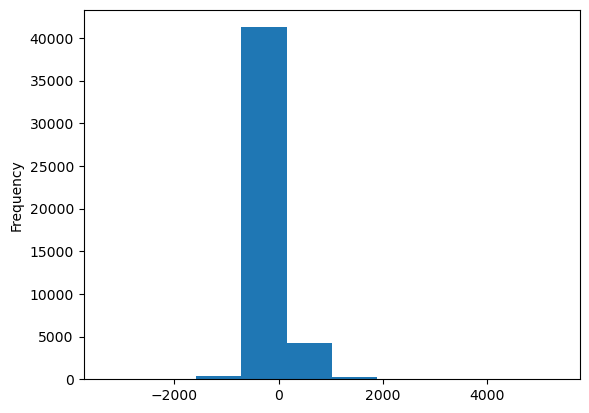

In [33]:
# draw a bar plot of tran_amt
customer_accounts_tnx_df['tran_amt'].plot(kind='hist')

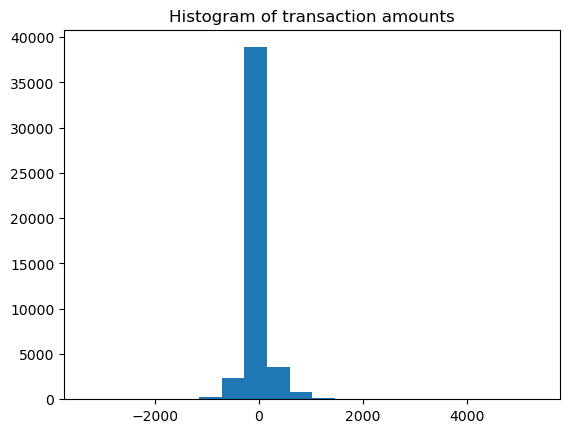

In [34]:
# changing bin w
plt.hist(customer_accounts_tnx_df['tran_amt'], bins=20)
plt.title('Histogram of transaction amounts')
plt.show()

In [35]:


# averageMonthlySpending

# 1. step 1: get the MONTH of each transaction
for idx in customer_accounts_tnx_df.index:
    td = customer_accounts_tnx_df.loc[idx, 'tran_date']
    customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month
    
customer_accounts_tnx_df['tran_month'] = customer_accounts_tnx_df['tran_month'].astype(int)
customer_accounts_tnx_df.head()

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_27395/2973490930.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_accounts_tnx_df.loc[idx, 'tran_month'] = pd.to_datetime(td).month


,cust_id,income,hasChecking,tran_amt,tran_date,tran_month
0,1362487,6605,Yes,0.00,10.2.1995,10
1,1362487,6605,Yes,3.60,31.3.1995,3
2,1362487,6605,Yes,2.62,30.4.1995,4
3,1362487,6605,Yes,-154.15,5.6.1995,5
4,1362487,6605,Yes,-10.00,30.6.1995,6


In [36]:
#2. use groupby  to get the total monthly transaction for each month
tnx_per_month = customer_accounts_tnx_df.groupby(['cust_id', 'tran_month']).sum('tran_amt')
tnx_per_month

income  tran_amt
cust_id tran_month                   
1362480 1           1577590   -109.96
        2           1323140   -321.65
        3            101780      0.00
        4            254450    647.58
        5            203560   -498.51
...                     ...       ...
1363495 5            117834     92.86
        6             39278     -6.80
        7             39278     -6.81
        8             39278     -6.81
        9            687365  -1737.56

[5694 rows x 2 columns]

In [37]:
# 3. get average monthly transaction = (Sum of totals/number of months)
tnx_average = tnx_per_month.groupby(['cust_id']).sum('tran_amt')/tnx_per_month.groupby(['cust_id']).count()
# we only need this column
tnx_average = tnx_average['tran_amt']
tnx_average.rename('averageMonthlySpending', inplace=True)
tnx_average

cust_id
1362480    -20.415833
1362484   -228.921818
1362485    -16.429000
1362486    -78.343333
1362487   -114.890833
              ...    
1363483     25.911000
1363484   -215.264545
1363492   -113.133636
1363493   -339.161667
1363495   -269.645556
Name: averageMonthlySpending, Length: 520, dtype: float64

In [38]:
# add the new column to the main df with pdmerge
customer_accounts_tnx_df = customer_accounts_tnx_df.merge(tnx_average, 
                                                          how='right',
                                                          left_on='cust_id', 
                                                          right_index=True)
customer_accounts_tnx_df.head()

,cust_id,income,hasChecking,tran_amt,tran_date,tran_month,averageMonthlySpending
30648,1362480,50890,Yes,-0.15,21.1.1995,1,-20.415833
30649,1362480,50890,Yes,0.00,12.1.1995,12,-20.415833
30650,1362480,50890,Yes,-166.07,5.1.1995,5,-20.415833
30651,1362480,50890,Yes,0.00,16.2.1995,2,-20.415833
30652,1362480,50890,Yes,-12.66,25.1.1995,1,-20.415833


In [39]:
# drop unnecessary columns
customer_checkings_df = customer_accounts_tnx_df.drop(columns=['tran_amt', 'tran_date', 'tran_month'], axis=1)
customer_checkings_df.head()

,cust_id,income,hasChecking,averageMonthlySpending
30648,1362480,50890,Yes,-20.415833
30649,1362480,50890,Yes,-20.415833
30650,1362480,50890,Yes,-20.415833
30651,1362480,50890,Yes,-20.415833
30652,1362480,50890,Yes,-20.415833


# Joining all the dataframes

In [40]:
customers_saving_df

,cust_id,hasSavings,tran_month,incomeToSavingsRatio
7577,1362480,Yes,6,2743.282468
7578,1362480,Yes,9,2743.282468
7579,1362480,Yes,3,2743.282468
7580,1362480,Yes,5,2743.282468
7581,1362480,Yes,5,2743.282468
...,...,...,...,...
3205,1363495,Yes,4,1530.974448
3206,1363495,Yes,4,1530.974448
3207,1363495,Yes,11,1530.974448
3208,1363495,Yes,9,1530.974448


In [41]:
customer_credit_df

,cust_id,hasCredit,creditLimitToSpendRatio
13881,1362480,Yes,14.112262
13882,1362480,Yes,14.112262
13883,1362480,Yes,14.112262
13884,1362480,Yes,14.112262
13885,1362480,Yes,14.112262
...,...,...,...
17342,1363492,Yes,-47.942199
17343,1363492,Yes,-47.942199
17344,1363492,Yes,-47.942199
17345,1363492,Yes,-47.942199


In [42]:
customer_checkings_df

,cust_id,income,hasChecking,averageMonthlySpending
30648,1362480,50890,Yes,-20.415833
30649,1362480,50890,Yes,-20.415833
30650,1362480,50890,Yes,-20.415833
30651,1362480,50890,Yes,-20.415833
30652,1362480,50890,Yes,-20.415833
...,...,...,...,...
13517,1363495,19639,Yes,-269.645556
13518,1363495,19639,Yes,-269.645556
13519,1363495,19639,Yes,-269.645556
13520,1363495,19639,Yes,-269.645556
